# 서울시 공공자전거

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 그래프를 노트북 안에 그리기ㅁ 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [4]:
df1 = pd.read_csv('data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('data/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('data/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('data/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('data/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)

In [5]:
df1.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11,1853.99
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10,0.00
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13,2291.05


## 데이터 연결 및 확인

In [6]:
# concat
df = pd.concat([df1,df2,df3,df4,df5,df6])
df.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.0


In [7]:
df.tail(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
3445943,SPB-52274,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,0,403.0,4541.22


In [8]:
# 데이터 크기
df.shape

(13613873, 11)

In [9]:
# 데이터 정보(사용메모리)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


## 데이터 전처리

### 불필요한 컬럼 제거

In [10]:
# 자전거번호, 대여거치대, 반납거치대 제거
df = df.drop(columns=['자전거번호','대여거치대','반납거치대'])
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05
...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   object 
 5   반납대여소명    object 
 6   이용시간      float64
 7   이용거리      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 934.8+ MB


### 자료형 확인 / 변경

In [12]:
# 자료형 확인
df.dtypes

대여일시         object
대여 대여소번호      int64
대여 대여소명      object
반납일시         object
반납대여소번호      object
반납대여소명       object
이용시간        float64
이용거리        float64
dtype: object

In [13]:
df['대여 대여소번호'].nunique()

2493

In [14]:
# 카테코리형으로 변경  대여 대여소번호, 반납대여소번호
df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [15]:
df.dtypes

대여일시          object
대여 대여소번호    category
대여 대여소명       object
반납일시          object
반납대여소번호     category
반납대여소명        object
이용시간         float64
이용거리         float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 779.2+ MB


In [17]:
# 대여 일시와 반납일시 datetime 변경
df['대여일시'] = pd.to_datetime(df['대여일시'])

In [18]:
# 에러났을 경우 대체법
df['반납일시'] = pd.to_datetime(df['반납일시'], errors='coerce')

In [19]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
dtype: object

### 결측치 확인/처리

In [20]:
df.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시        123
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [21]:
# 결측치 제거
df.dropna(inplace=True)

In [22]:
# 결측치 확인
df.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

## 일별 이용현황

In [23]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05
...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00


In [24]:
# year, month, day, date
df['대여날짜'] = df['대여일시'].dt.date

In [25]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18
...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36,2021-06-30
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71,2021-06-30
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00,2021-06-30
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,2021-06-30


### 대여날짜별 대여 건수

In [26]:
# 대여날짜 별 대여건수 추출
df_count = df.groupby('대여날짜').대여일시.count().to_frame()

In [27]:
df_count.columns=['대여건수']

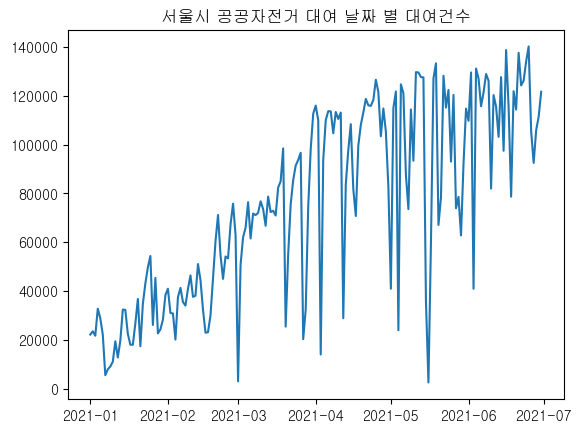

In [28]:
df_count
plt.plot(df_count.index,df_count.values)
plt.title('서울시 공공자전거 대여 날짜 별 대여건수')
plt.show()

### 대여날짜 별 이용시간

In [29]:
# 대여날짜 별 이용시간 추출
df_time = df.groupby('대여날짜').이용시간.sum().to_frame()
df_time

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


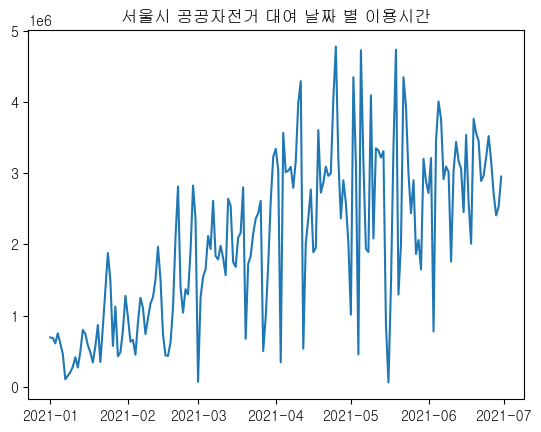

In [30]:
df_time
plt.plot(df_time.index,df_time['이용시간'])
plt.title('서울시 공공자전거 대여 날짜 별 이용시간')
plt.show()

### 대여날짜 별 이용 거리

In [31]:
df_distance = df.groupby('대여날짜').이용거리.sum().to_frame()
df_distance

,이용거리
대여날짜,
2021-01-01,4.613529e+07
2021-01-02,4.409618e+07
2021-01-03,4.059830e+07
2021-01-04,5.249645e+07
2021-01-05,6.944856e+07
...,...
2021-06-26,3.635015e+08
2021-06-27,3.078146e+08
2021-06-28,2.828124e+08


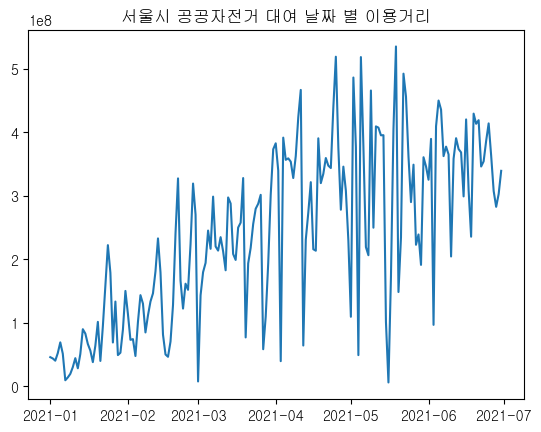

In [32]:
df_distance
plt.plot(df_distance.index,df_distance['이용거리'])
plt.title('서울시 공공자전거 대여 날짜 별 이용거리')
plt.show()

### 데이터 프레임 합치기

In [33]:
df_date = pd.concat([df_time,df_distance,df_count], axis=1)
df_date

,이용시간,이용거리,대여건수
대여날짜,,,
2021-01-01,692309.0,4.613529e+07,22119
2021-01-02,686580.0,4.409618e+07,23463
2021-01-03,609571.0,4.059830e+07,21656
2021-01-04,750721.0,5.249645e+07,32732
2021-01-05,610227.0,6.944856e+07,28819
...,...,...,...
2021-06-26,3168288.0,3.635015e+08,105414
2021-06-27,2706168.0,3.078146e+08,92486
2021-06-28,2405249.0,2.828124e+08,105882


## 시간대별 대여/반납 현황

In [34]:
df['대여시간'] = df['대여일시'].dt.hour
df['반납시간'] = df['반납일시'].dt.hour

In [35]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
대여날짜                object
대여시간                 int64
반납시간                 int64
dtype: object

In [36]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18
...,...,...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36,2021-06-30,22,4
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71,2021-06-30,22,4
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00,2021-06-30,22,4
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4


In [40]:
# 시간대별 대여현황
s_rental = df['대여시간'].value_counts()
s_rental

18    1432779
17    1178279
19     984476
16     934211
20     825031
15     816040
8      808506
21     770378
14     725175
13     667237
22     643611
12     623065
11     537810
9      499995
7      486775
10     438084
23     341859
0      240025
6      188920
1      158905
2      103629
5       84713
3       68710
4       55391
Name: 대여시간, dtype: int64

In [41]:
s_return = df['반납시간'].value_counts()
s_return

18    1437723
19    1125447
17    1097623
16     880629
20     864644
8      817076
21     812357
22     768302
15     749940
14     657826
13     628908
12     591577
9      499033
11     470053
23     447477
10     402350
7      389007
0      290169
1      190954
6      152003
2      125912
3       80243
5       73983
4       60368
Name: 반납시간, dtype: int64

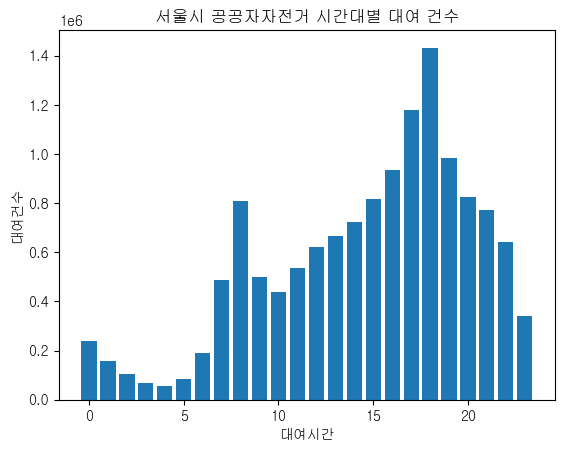

In [45]:
# 시간대별 공공자전거 대여건수 시각화
s_rental = s_rental.sort_index()
s_rental
x = s_rental.index
y = s_rental.values
plt.bar(x,y)
plt.title('서울시 공공자자전거 시간대별 대여 건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()

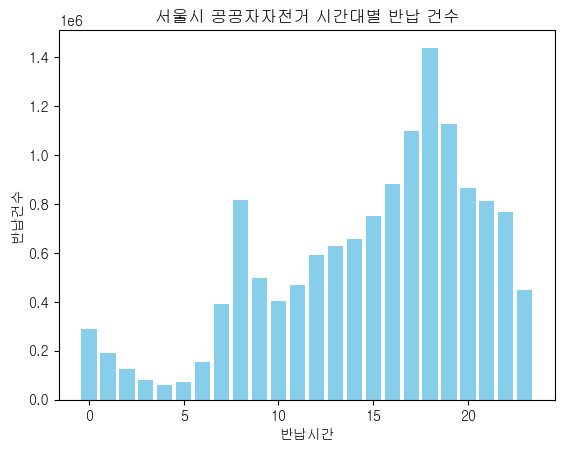

In [49]:
# 시간대별 공공자전거 대여건수 시각화
s_renturn = s_return.sort_index()
s_renturn
x = s_renturn.index
y = s_renturn.values
plt.bar(x,y,color='skyblue')
plt.title('서울시 공공자자전거 시간대별 반납 건수')
plt.xlabel('반납시간')
plt.ylabel('반납건수')
plt.show()

## 대여소별 대여/반납 현황

### 대여소 현황

In [51]:
# 대여 대여소번호로 대여소 확인
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18
...,...,...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36,2021-06-30,22,4
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71,2021-06-30,22,4
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00,2021-06-30,22,4
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4


In [52]:
df['대여 대여소번호']

0             3
1             3
2             3
3             3
4             3
           ... 
3445939     152
3445940     152
3445941     152
3445942    2220
3445943    2220
Name: 대여 대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [53]:
df['반납대여소번호'] 
# 00126처럼 00이 붙어있어 데이터가 많다
# 반납대여소 object를 int로 바꾸고 00을 바꿔준다

0            668
1            668
2            668
3            668
4            540
           ...  
3445939    00126
3445940    00437
3445941    00437
3445942    02526
3445943    02526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (4811, object): [3, 10, 101, 102, ..., '화랑대역 2번출구 앞', '휘경sk뷰아파트 앞', '휘경여중고삼거리', '흑석역 4번출구']

In [55]:
df[df['반납대여소번호'] == '00126']

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
2017,2021-02-01 07:07:58,137,NH농협 신촌지점 앞,2021-02-01 07:12:15,00126,서강대 후문 옆,4.0,937.02,2021-02-01,7,7
2571,2021-02-01 07:38:58,124,서강대 정문 건너편,2021-02-01 07:42:16,00126,서강대 후문 옆,3.0,0.00,2021-02-01,7,7
2760,2021-02-01 06:39:07,1224,아시아지하보도 2번 출구,2021-02-01 07:49:08,00126,서강대 후문 옆,70.0,17854.58,2021-02-01,6,7
4161,2021-02-01 07:54:18,3124,DMC센트럴아이파크아파트,2021-02-01 08:26:21,00126,서강대 후문 옆,32.0,4932.51,2021-02-01,7,8
6641,2021-02-01 08:07:52,126,서강대 후문 옆,2021-02-01 09:17:22,00126,서강대 후문 옆,69.0,1569.78,2021-02-01,8,9
...,...,...,...,...,...,...,...,...,...,...,...
3437328,2021-06-30 20:34:21,126,서강대 후문 옆,2021-06-30 22:12:42,00126,서강대 후문 옆,98.0,19303.26,2021-06-30,20,22
3441699,2021-06-30 22:36:23,437,대흥역 1번출구,2021-06-30 22:40:23,00126,서강대 후문 옆,4.0,463.22,2021-06-30,22,22
3445875,2021-06-30 23:54:14,436,이대역 5번출구,2021-07-01 00:45:04,00126,서강대 후문 옆,50.0,8249.34,2021-06-30,23,0
3445928,2021-06-30 22:11:24,126,서강대 후문 옆,2021-07-01 01:29:51,00126,서강대 후문 옆,198.0,20291.54,2021-06-30,22,1


In [56]:
# 반납대여소번호 str형으로 변환
df['반납대여소번호'] = df['반납대여소번호'].astype('str')

In [57]:
# 반납대여소 번호 처리(왼쪽의 ' 0' 제거) str일때만 가능
df['반납대여소번호'].str.lstrip('0')

0           668
1           668
2           668
3           668
4           540
           ... 
3445939     126
3445940     437
3445941     437
3445942    2526
3445943    2526
Name: 반납대여소번호, Length: 13613604, dtype: object

In [58]:
# 반납대여소 번호 처리(int변환)
df['반납대여소번호'] = df['반납대여소번호'].astype('int')

In [59]:
# 반납대여소 번호 처리 (category형으로)
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [60]:
df['반납대여소번호']

0           668
1           668
2           668
3           668
4           540
           ... 
3445939     126
3445940     437
3445941     437
3445942    2526
3445943    2526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

### 대여건수가 가장많은 대여소 best10

In [61]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18
...,...,...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,126,서강대 후문 옆,364.0,10153.36,2021-06-30,22,4
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,437,대흥역 1번출구,367.0,10100.71,2021-06-30,22,4
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,437,대흥역 1번출구,368.0,430.00,2021-06-30,22,4
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4


In [66]:
# 대여대여소번호와 대여대여소명을 가져오기
df[['대여 대여소번호','대여 대여소명']].value_counts()[:10].to_frame()

,,0
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,68994
502,뚝섬유원지역 1번출구 앞,68588
152,마포구민체육센터 앞,43535
2102,봉림교 교통섬,43368
1210,롯데월드타워(잠실역2번출구 쪽),37149
2715,마곡나루역 2번 출구,36988
2177,신대방역 2번 출구,31971
272,당산육갑문,31527
210,IFC몰,31443


### 반납건수가 가장 많은 대여소 best10

In [68]:
df[['반납대여소번호','반납대여소명']].value_counts()[:10].to_frame()

,,0
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,78958
207,여의나루역 1번출구 앞,68966
152,마포구민체육센터 앞,50607
2102,봉림교 교통섬,44572
1210,롯데월드타워(잠실역2번출구 쪽),37344
2715,마곡나루역 2번 출구,36876
272,당산육갑문,34276
210,IFC몰,33758
2177,신대방역 2번 출구,33159


## 여의나루역 1번출구 앞 대여소 이용현황

In [70]:
df_207 = df[df['대여 대여소번호'] == 207]
df_207

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11
...,...,...,...,...,...,...,...,...,...,...,...
3445365,2021-06-30 22:34:23,207,여의나루역 1번출구 앞,2021-07-01 00:12:03,4526,목동아파트2단지 222동 앞,97.0,9268.32,2021-06-30,22,0
3445420,2021-06-30 22:36:03,207,여의나루역 1번출구 앞,2021-07-01 00:12:31,1148,볏골공원,96.0,10957.26,2021-06-30,22,0
3445452,2021-06-30 22:36:11,207,여의나루역 1번출구 앞,2021-07-01 00:12:44,704,남부법원검찰청 교차로,96.0,11358.59,2021-06-30,22,0
3445463,2021-06-30 22:53:04,207,여의나루역 1번출구 앞,2021-07-01 00:12:47,207,여의나루역 1번출구 앞,80.0,0.00,2021-06-30,22,0


In [72]:
# 반납현황
df_207[['반납대여소번호','반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
...,...,...
2414,도곡역 아카데미스위트 앞,1
669,청계한신휴플러스앞 삼거리,1
1661,당현천근린공원,1


### 요일별 대여현황

In [76]:
# 요일 칼람 추가 : srtftime('%a)
df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')

C:\Users\twas0\AppData\Local\Temp\ipykernel_6360\2779116783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')


In [77]:
df_207

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,대여요일
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,Fri
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,Fri
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,Fri
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,Fri
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...
3445365,2021-06-30 22:34:23,207,여의나루역 1번출구 앞,2021-07-01 00:12:03,4526,목동아파트2단지 222동 앞,97.0,9268.32,2021-06-30,22,0,Wed
3445420,2021-06-30 22:36:03,207,여의나루역 1번출구 앞,2021-07-01 00:12:31,1148,볏골공원,96.0,10957.26,2021-06-30,22,0,Wed
3445452,2021-06-30 22:36:11,207,여의나루역 1번출구 앞,2021-07-01 00:12:44,704,남부법원검찰청 교차로,96.0,11358.59,2021-06-30,22,0,Wed
3445463,2021-06-30 22:53:04,207,여의나루역 1번출구 앞,2021-07-01 00:12:47,207,여의나루역 1번출구 앞,80.0,0.00,2021-06-30,22,0,Wed


In [78]:
df_207['대여요일'].value_counts()

Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8037
Tue     7235
Name: 대여요일, dtype: int64

### 이용시간 통계

In [79]:
df_207['이용시간'].mean()

50.28551344300312

In [80]:
df_207['이용시간'].max()

1268.0

In [81]:
df_207['이용시간'].min()

1.0

In [82]:
# 전체데이터 이용시간 평균
df['이용시간'].mean()

27.27823322905529

# 서울시 물가정보 분석

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
# 그래프를 노트북 안에 그리기ㅁ 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [86]:
df = pd.read_csv('data/생필품 농수축산물 가격 정보(2021년1월_6월).csv', encoding='cp949')

In [87]:
df

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42694,1636118,226,롯데마트 구로점,171,달걀(10개),10개(600g),2990,2021-01,"국내산,특란",2,대형마트,530000,구로구,2021-01-21
42695,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
42696,1636114,226,롯데마트 구로점,312,애호박,1개 (300g),2790,2021-01,"국내산,청원",2,대형마트,530000,구로구,2021-01-21
42697,1636113,226,롯데마트 구로점,22,오이,1개 (200g),1190,2021-01,"국내산,백오이",2,대형마트,530000,구로구,2021-01-21


In [88]:
df.isnull().sum()

일련번호                   0
시장/마트 번호               0
시장/마트 이름               0
품목 번호                  0
품목 이름                  0
실판매규격                  0
가격(원)                  0
년도-월                   0
비고                   274
시장유형 구분(시장/마트) 코드      0
시장유형 구분(시장/마트) 이름      0
자치구 코드                 0
자치구 이름                 0
점검일자                   0
dtype: int64

In [90]:
df.dtypes

일련번호                  int64
시장/마트 번호              int64
시장/마트 이름             object
품목 번호                 int64
품목 이름                object
실판매규격                object
가격(원)                 int64
년도-월                 object
비고                   object
시장유형 구분(시장/마트) 코드     int64
시장유형 구분(시장/마트) 이름    object
자치구 코드                int64
자치구 이름               object
점검일자                 object
dtype: object

## 데이터확인
### 컬럼별 데이터확인

In [93]:
df['시장/마트 번호'].nunique()

102

### 시장/마트 목록

In [96]:
df['시장/마트 이름'].nunique()

102

In [97]:
df['시장/마트 이름'].unique()

array(['신세계백화점', '방배종합시장', '통인시장', '방학동도깨비시장', '이마트 용산점', '용문시장',
       'NC백화점 불광점', '관악신사시장(신림4동)', '영천시장', '고척근린시장', '이마트 여의도점',
       '현대백화점 미아점', '롯데백화점', '이마트 가양점', '홈플러스 동대문점', '송화시장', '영등포전통시장',
       '홈플러스 등촌점', '후암시장', '경동시장', '롯데마트 강변점', '롯데백화점 노원점', '롯데백화점 청량리점',
       '홈플러스 영등포점', '우림시장', '청량리종합시장', '농협 하나로마트 용산점', '이마트 자양점',
       '롯데백화점 미아점', '자양골목시장', '수유재래시장', '홈플러스 중계점', '금남시장', '인왕시장',
       '원당종합시장', '목3동시장', '신영시장', '이마트 왕십리점', '뉴코아아울렛 강남점', '망원시장',
       '마천중앙시장', '신세계백화점 강남점', '롯데백화점 영등포점', '남성시장', '마포농수산물시장',
       '이마트 창동점', '공릉동 도깨비시장', '홈플러스 면목점', '이마트 청계점', '이마트 성수점',
       '홈플러스 방학점', '이마트 역삼점', '남구로시장', '이마트 은평점', '뚝도시장', '롯데백화점 강남점',
       '노룬산골목시장', '현대백화점 신촌점', '홈플러스 목동점', '태평백화점', '대조시장', '남문시장',
       '광장시장', '대림중앙시장', '남대문시장', '하나로클럽 양재점', '현대시장', '상계중앙시장',
       '농협하나로마트 신촌점', '이마트 신도림점', '신창시장', '롯데백화점 잠실점', '이마트 목동점',
       '홈플러스 잠실점', '대림시장', '홈플러스 시흥점', '암사종합시장', '이마트 상봉점', '숭인시장',
       '둔촌역전통시장', '홈플러스 월드컵점', '도곡시장', '신원시장(신림1동)',

In [103]:
# 시장/마트 목록
df_market = df[['시장/마트 번호','시장/마트 이름','자치구 이름','시장유형 구분(시장/마트) 이름']].drop_duplicates() 
df_market
# 중복제거한 행만 가져오기

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
1,228,방배종합시장,서초구,전통시장
2,1,통인시장,종로구,전통시장
3,25,방학동도깨비시장,도봉구,전통시장
4,6,이마트 용산점,용산구,대형마트
...,...,...,...,...
5339,91,동원시장,중랑구,전통시장
5341,206,하나로클럽 미아점,강북구,대형마트
6609,227,NC백화점 신구로점,구로구,대형마트
21043,225,이마트 에브리데이 창동점,도봉구,대형마트


In [105]:
# 자치구 별 시장/마트 개수
df_market['자치구 이름'].value_counts()

중구      6
도봉구     5
관악구     5
구로구     5
영등포구    5
노원구     4
금천구     4
강남구     4
송파구     4
마포구     4
양천구     4
성동구     4
강북구     4
중랑구     4
동대문구    4
광진구     4
서초구     4
강서구     4
성북구     4
서대문구    4
은평구     4
용산구     4
강동구     4
동작구     2
종로구     2
Name: 자치구 이름, dtype: int64

In [107]:
# 자치구 이름으로 시장/마트 확인
df_market[df_market['자치구 이름'] == '중구']

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
21,56,롯데백화점,중구,대형마트
257,60,이마트 청계점,중구,대형마트
576,11,남대문시장,중구,전통시장
3799,8,롯데마트 서울역점,중구,대형마트
4920,199,서울중앙시장,중구,전통시장


### 품목 목록

In [114]:
df_items = df[['품목 번호','품목 이름']].drop_duplicates()
df_items = df_items.sort_values('품목 이름') # 데이터프레임 정렬

In [115]:
# 품목 이름(30개씩 확인)
df_items[:30]

,품목 번호,품목 이름
222,13,고등어
135,304,고등어
15781,316,"고등어(30cm,국산)"
1550,318,"고등어(30cm,수입산)"
3,268,"고등어(냉동,국산)"
4834,269,"고등어(냉동,수입산)"
2,266,"고등어(생물,국산)"
1341,267,"고등어(생물,수입산)"
3984,314,"냉동참조기(20cm,국산)"
3706,313,"냉동참조기(20cm,수입)"


In [116]:
df_items[31:60]

,품목 번호,품목 이름
1019,184,"명태(일본산,냉동)"
79,25,무
103,308,무(1kg)
0,133,무(세척무)
33,282,무(세척무)
2432,274,"무(세척무, 중)"
157,27,배
56,276,배(신고)
4268,248,"배(신고),중급(대)"
14,306,"배(신고, 600g)"


In [117]:
df_items[60:]

,품목 번호,품목 이름
10,309,양파(1.5kg망)
2191,272,양파(작은망)
5,22,오이
21,311,오이(다다기)
31,253,오징어
2620,54,오징어(냉동)
441,256,"오징어(냉동,국산)"
6813,257,"오징어(냉동,수입산)"
36,254,"오징어(생물,국산)"
2567,255,"오징어(생물,수입산)"


### 자치구 목록

In [120]:
df_gu = df[['자치구 코드','자치구 이름']].drop_duplicates()
df_gu.shape # 서울시 25개 자치구

(25, 2)

### 시장유형

In [123]:
df_type = df[['시장유형 구분(시장/마트) 코드','시장유형 구분(시장/마트) 이름']].drop_duplicates()
df_type

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장


## 삼겹살 가격 분석

* 특정 문자열이 포함되어있는지 확인: .str.contains(문자열)

In [130]:
# 2021년 6월 삼겹살 600g 데이터
df_sam = df[(df['품목 이름'].str.contains('삼겹살')) & (df['년도-월']=='2021-06') & (df['실판매규격'].str.contains('600g'))] 
df_sam


,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,1668261,100,홈플러스 중계점,99,돼지고기(생삼겹살),600g,22140,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
6514,1674124,40,홈플러스 등촌점,99,돼지고기(생삼겹살),600g,14940,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
6700,1671992,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,도드람,2,대형마트,290000,성북구,2021-06-24
6721,1670048,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24


In [131]:
# 삼겹살 600g의 평균가격
df_sam['가격(원)'].mean()

16842.723214285714

In [132]:
# 삼겹살 600g의 최고 가격
df_sam['가격(원)'].max()

35890

In [133]:
df_sam['가격(원)'].min() # 이상함

1690

In [135]:
df_sam[df_sam['가격(원)']<5000]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
3645,1667404,27,이마트 창동점,99,돼지고기(생삼겹살),600g,2720,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24


### 우리동네 삼겹살 가격

In [136]:
gu = input('구이름:')

구이름:송파구


In [142]:
# 우리구 삼겹살 가격
df_sam_gu = df_sam[df_sam['자치구 이름']==gu][['시장/마트 이름','품목 이름','실판매규격','가격(원)']].drop_duplicates()
df_sam_gu

,시장/마트 이름,품목 이름,실판매규격,가격(원)
3711,마천중앙시장,돼지고기(생삼겹살),600g,15000
3744,마천중앙시장,돼지고기(생삼겹살),600g,12800
3811,방이시장,돼지고기(생삼겹살),600g,12000
3855,방이시장,돼지고기(생삼겹살),600g,17000
3956,롯데백화점 잠실점,돼지고기(생삼겹살),600g,29880
4043,롯데백화점 잠실점,돼지고기(생삼겹살),600g,35890
4145,홈플러스 잠실점,돼지고기(생삼겹살),600g,12000
4158,홈플러스 잠실점,돼지고기(생삼겹살),600g,11940
4198,홈플러스 잠실점,돼지고기(생삼겹살),600g,19920
4217,홈플러스 잠실점,돼지고기(생삼겹살),600g,10740


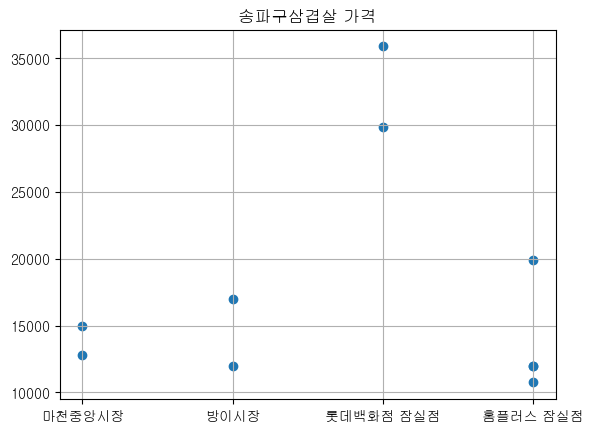

In [146]:
# 시각화
x = df_sam_gu['시장/마트 이름']
y = df_sam_gu['가격(원)']
plt.scatter(x,y)
plt.title(gu + '삼겹살 가격')
plt.grid(True)
plt.show()

### 마트지점별 삼겹살 가격

In [147]:
mart = input('시장/마트이름:')

시장/마트이름:이마트


In [152]:
df_sam_mart = df_sam[df_sam['시장/마트 이름'].str.contains(mart)][['시장/마트 이름','품목 이름','실판매규격','가격(원)']][['시장/마트 이름','품목 이름','실판매규격','가격(원)']].drop_duplicates()
df_sam_mart

,시장/마트 이름,품목 이름,실판매규격,가격(원)
76,이마트 가양점,돼지고기(생삼겹살),600g,15480
86,이마트 가양점,돼지고기(생삼겹살),600g,14880
325,이마트 성수점,돼지고기(생삼겹살),600g,15480
459,이마트 자양점,돼지고기(생삼겹살),600g,14880
745,이마트 자양점,돼지고기(생삼겹살),600g,22080
1021,이마트 가양점,돼지고기(생삼겹살),600g,14100
3436,이마트 왕십리점,돼지고기(생삼겹살),600g,14880
3461,이마트 왕십리점,돼지고기(생삼겹살),600g,15480
3477,이마트 왕십리점,돼지고기(생삼겹살),600g,14100
3593,이마트 창동점,돼지고기(생삼겹살),600g,14100


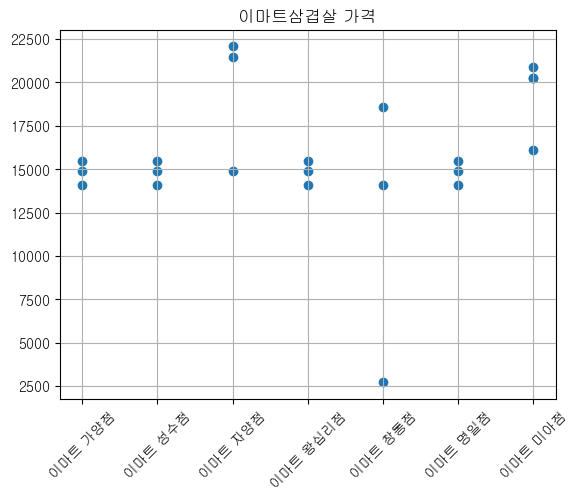

In [156]:
# 시각화
df_sam_mart
x = df_sam_mart['시장/마트 이름']
y = df_sam_mart['가격(원)']
plt.scatter(x,y)
plt.grid(True)
plt.title(mart + '삼겹살 가격')
plt.xticks(rotation=45)
plt.show()

## 달걀 가격 분석

In [162]:
df_egg = df[(df['품목 이름'].str.contains('달걀')) & (df['년도-월']=='2021-06') & (df['실판매규격'].str.contains('30개')) & (df['가격(원)']>0)]
df_egg

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
75,1667237,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
82,1674093,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6670,1669415,227,NC백화점 신구로점,17,달걀,30개(1.8kg),8990,2021-06,"국내산,특란",2,대형마트,530000,구로구,2021-06-24
6716,1668990,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
6756,1672097,102,목3동시장,320,달걀(30개),30개,9800,2021-06,"국내산 ,특란",1,전통시장,470000,양천구,2021-06-24
6771,1674008,102,목3동시장,320,달걀(30개),30개,9500,2021-06,"국내산,특란",1,전통시장,470000,양천구,2021-06-24


In [165]:
# 달걀 평균 가격
df_egg['가격(원)'].mean()

9442.334426229509

In [167]:
df_egg['가격(원)'].max()

75000

In [171]:
df_egg[df_egg['가격(원)'] < 6000]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
1477,1669024,75,이마트 성수점,320,달걀(30개),30개,5520,2021-06,국내산신선한란,2,대형마트,200000,성동구,2021-06-24


In [168]:
df_egg['가격(원)'].min()

5520

### 우리동네 달갈 가격

In [201]:
gu = input('구이름:')

구이름:송파구


In [205]:
df_egg_gu = df_egg[df_egg['자치구 이름']==gu][['시장/마트 이름','품목 이름','실판매규격','가격(원)']].drop_duplicates()
df_egg_gu

,시장/마트 이름,품목 이름,실판매규격,가격(원)


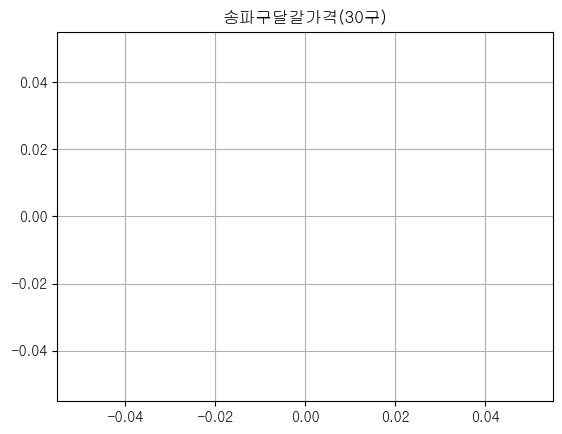

In [190]:
df_egg_gu.sort_values('가격(원)')
x = df_egg_gu['시장/마트 이름']
y = df_egg_gu['가격(원)']
plt.scatter(x,y)
plt.grid(True)
plt.title(gu + '달갈가격(30구)')
plt.show()

### 마트 지점별 달걀 가격

In [191]:
gu = input('마트이름:')

마트이름:이마트


In [193]:
df_egg_mart = df_egg[df_egg['시장/마트 이름'].str.contains(gu)][['시장/마트 이름','품목 이름','실판매규격','가격(원)']].drop_duplicates()
df_egg_mart

,시장/마트 이름,품목 이름,실판매규격,가격(원)
62,이마트 가양점,달걀(30개),30개(1800g),6900
436,이마트 역삼점,달걀(30개),30개,12360
542,이마트 역삼점,달걀(30개),30개,7980
1212,이마트 용산점,달걀(30개),30개,6900
1395,이마트 청계점,달걀(30개),30개,7180
1419,이마트 자양점,달걀(30개),30개,6900
1477,이마트 성수점,달걀(30개),30개,5520
1499,이마트 여의도점,달걀(30개),30개,6990
1761,이마트 상봉점,달걀(30개),30개,6880
1847,이마트 여의도점,달걀(30개),30개,9980


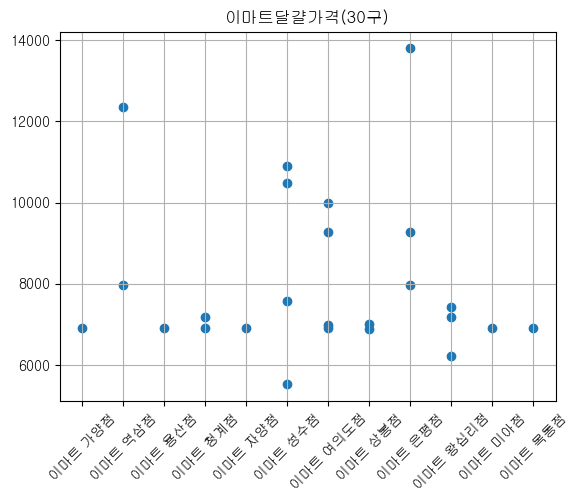

In [198]:
x = df_egg_mart['시장/마트 이름']
y = df_egg_mart['가격(원)']
plt.scatter(x,y)
plt.xticks(rotation=45)
plt.grid(True)
plt.title(gu + '달걀가격(30구)')
plt.show()

# 지하철 승하차 현황분석

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

In [207]:
# 그래프를 노트북 안에 그리기ㅁ 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [255]:
df = pd.read_csv('data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding = 'cp949')

In [256]:
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,5983,7,1043,2,2,0,2,0,0,20210903
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,1759,4,827,0,0,0,0,0,0,20210903
2,202108,1호선,서울역,483,11,7963,5533,10871,31479,31643,...,4968,21,444,1,1,0,0,0,0,20210903
3,202108,1호선,시청,6,0,1597,4399,2727,17957,5971,...,822,3,72,0,2,0,0,0,0,20210903
4,202108,1호선,신설동,247,6,6828,2721,7333,9771,14821,...,3747,15,390,0,0,0,0,0,0,20210903


In [257]:
df.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
46547,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
46548,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
46549,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
46550,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223
46551,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223


## 데이터 확인 및 전처리

In [258]:
df.shape

(46552, 52)

In [259]:
df.isnull().sum()

사용월             0
호선명             0
지하철역            0
04시-05시 승차인원    0
04시-05시 하차인원    0
05시-06시 승차인원    0
05시-06시 하차인원    0
06시-07시 승차인원    0
06시-07시 하차인원    0
07시-08시 승차인원    0
07시-08시 하차인원    0
08시-09시 승차인원    0
08시-09시 하차인원    0
09시-10시 승차인원    0
09시-10시 하차인원    0
10시-11시 승차인원    0
10시-11시 하차인원    0
11시-12시 승차인원    0
11시-12시 하차인원    0
12시-13시 승차인원    0
12시-13시 하차인원    0
13시-14시 승차인원    0
13시-14시 하차인원    0
14시-15시 승차인원    0
14시-15시 하차인원    0
15시-16시 승차인원    0
15시-16시 하차인원    0
16시-17시 승차인원    0
16시-17시 하차인원    0
17시-18시 승차인원    0
17시-18시 하차인원    0
18시-19시 승차인원    0
18시-19시 하차인원    0
19시-20시 승차인원    0
19시-20시 하차인원    0
20시-21시 승차인원    0
20시-21시 하차인원    0
21시-22시 승차인원    0
21시-22시 하차인원    0
22시-23시 승차인원    0
22시-23시 하차인원    0
23시-24시 승차인원    0
23시-24시 하차인원    0
00시-01시 승차인원    0
00시-01시 하차인원    0
01시-02시 승차인원    0
01시-02시 하차인원    0
02시-03시 승차인원    0
02시-03시 하차인원    0
03시-04시 승차인원    0
03시-04시 하차인원    0
작업일자            0
dtype: int64

### 컬럼별 데이터확인

In [260]:
# 사용월
df['사용월'].unique()

array([202108, 202107, 202106, 202105, 202104, 202103, 202102, 202101,
       202012, 202011, 202010, 202009, 202008, 202007, 202006, 202005,
       202004, 202003, 202002, 202001, 201912, 201911, 201910, 201909,
       201908, 201907, 201906, 201905, 201904, 201903, 201902, 201901,
       201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805,
       201804, 201803, 201802, 201801, 201712, 201711, 201710, 201709,
       201708, 201707, 201706, 201705, 201704, 201703, 201702, 201701,
       201612, 201611, 201610, 201609, 201608, 201607, 201606, 201605,
       201604, 201603, 201602, 201601, 201512, 201511, 201510, 201509,
       201508, 201507, 201506, 201505, 201504, 201503, 201502, 201501],
      dtype=int64)

In [261]:
# 호선명
df['호선명'].unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '9호선2단계'],
      dtype=object)

### 데이터 타입 확인 및 변경

In [262]:
df.dtypes

사용월              int64
호선명             object
지하철역            object
04시-05시 승차인원     int64
04시-05시 하차인원     int64
05시-06시 승차인원     int64
05시-06시 하차인원     int64
06시-07시 승차인원     int64
06시-07시 하차인원     int64
07시-08시 승차인원     int64
07시-08시 하차인원     int64
08시-09시 승차인원     int64
08시-09시 하차인원     int64
09시-10시 승차인원     int64
09시-10시 하차인원     int64
10시-11시 승차인원     int64
10시-11시 하차인원     int64
11시-12시 승차인원     int64
11시-12시 하차인원     int64
12시-13시 승차인원     int64
12시-13시 하차인원     int64
13시-14시 승차인원     int64
13시-14시 하차인원     int64
14시-15시 승차인원     int64
14시-15시 하차인원     int64
15시-16시 승차인원     int64
15시-16시 하차인원     int64
16시-17시 승차인원     int64
16시-17시 하차인원     int64
17시-18시 승차인원     int64
17시-18시 하차인원     int64
18시-19시 승차인원     int64
18시-19시 하차인원     int64
19시-20시 승차인원     int64
19시-20시 하차인원     int64
20시-21시 승차인원     int64
20시-21시 하차인원     int64
21시-22시 승차인원     int64
21시-22시 하차인원     int64
22시-23시 승차인원     int64
22시-23시 하차인원     int64
23시-24시 승차인원     int64
23시-24시 하차인원     int64
00시-01시 승차인

In [263]:
# 사용월을 다루기 위해서는 int보다 object가 더 낫다
df['사용월'] = df['사용월'].astype('object')
df.dtypes

사용월             object
호선명             object
지하철역            object
04시-05시 승차인원     int64
04시-05시 하차인원     int64
05시-06시 승차인원     int64
05시-06시 하차인원     int64
06시-07시 승차인원     int64
06시-07시 하차인원     int64
07시-08시 승차인원     int64
07시-08시 하차인원     int64
08시-09시 승차인원     int64
08시-09시 하차인원     int64
09시-10시 승차인원     int64
09시-10시 하차인원     int64
10시-11시 승차인원     int64
10시-11시 하차인원     int64
11시-12시 승차인원     int64
11시-12시 하차인원     int64
12시-13시 승차인원     int64
12시-13시 하차인원     int64
13시-14시 승차인원     int64
13시-14시 하차인원     int64
14시-15시 승차인원     int64
14시-15시 하차인원     int64
15시-16시 승차인원     int64
15시-16시 하차인원     int64
16시-17시 승차인원     int64
16시-17시 하차인원     int64
17시-18시 승차인원     int64
17시-18시 하차인원     int64
18시-19시 승차인원     int64
18시-19시 하차인원     int64
19시-20시 승차인원     int64
19시-20시 하차인원     int64
20시-21시 승차인원     int64
20시-21시 하차인원     int64
21시-22시 승차인원     int64
21시-22시 하차인원     int64
22시-23시 승차인원     int64
22시-23시 하차인원     int64
23시-24시 승차인원     int64
23시-24시 하차인원     int64
00시-01시 승차인

### 불필요한 컬럼 삭제

In [264]:
df.drop(columns=['작업일자'],inplace=True)
df

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,1633,5983,7,1043,2,2,0,2,0,0
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,577,1759,4,827,0,0,0,0,0,0
2,202108,1호선,서울역,483,11,7963,5533,10871,31479,31643,...,7756,4968,21,444,1,1,0,0,0,0
3,202108,1호선,시청,6,0,1597,4399,2727,17957,5971,...,2462,822,3,72,0,2,0,0,0,0
4,202108,1호선,신설동,247,6,6828,2721,7333,9771,14821,...,1352,3747,15,390,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46547,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,111,633,3,222,0,0,0,0,0,0
46548,201501,중앙선,원덕,1,0,292,4,415,46,537,...,8,383,3,157,0,0,0,0,0,0
46549,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,1619,6501,86,1617,0,0,0,0,0,0
46550,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,107,336,8,85,0,0,0,0,0,0


### 승차/하차 테이블 분리

In [265]:
df

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,1633,5983,7,1043,2,2,0,2,0,0
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,577,1759,4,827,0,0,0,0,0,0
2,202108,1호선,서울역,483,11,7963,5533,10871,31479,31643,...,7756,4968,21,444,1,1,0,0,0,0
3,202108,1호선,시청,6,0,1597,4399,2727,17957,5971,...,2462,822,3,72,0,2,0,0,0,0
4,202108,1호선,신설동,247,6,6828,2721,7333,9771,14821,...,1352,3747,15,390,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46547,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,111,633,3,222,0,0,0,0,0,0
46548,201501,중앙선,원덕,1,0,292,4,415,46,537,...,8,383,3,157,0,0,0,0,0,0
46549,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,1619,6501,86,1617,0,0,0,0,0,0
46550,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,107,336,8,85,0,0,0,0,0,0


In [266]:
# 공통 컬럼
df1 = df.iloc[:,:3] # 모든행에 대해 0,1,2행만 가져와라
# 승차 컬럼만 가져오기
df2 = df.iloc[:,3::2]
df2.columns= df2.columns.str.split(' ').str[0] # 컬럼명 시간만 가져오기
# 공통 컬럼과 승차컬럼 연결하기
df_in = pd.concat([df1,df2],axis=1)

In [267]:
df_in

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0
3,202108,1호선,시청,6,1597,2727,5971,6884,7541,8328,...,119064,41635,31787,27796,13739,2462,3,0,0,0
4,202108,1호선,신설동,247,6828,7333,14821,20523,14881,13551,...,48482,18413,11610,9764,5955,1352,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46547,201501,중앙선,운길산,0,177,642,1292,1479,1438,1408,...,2304,1332,1002,942,270,111,3,0,0,0
46548,201501,중앙선,원덕,1,292,415,537,823,980,1025,...,563,175,156,53,71,8,3,0,0,0
46549,201501,중앙선,중랑,14,4929,8539,22160,25792,14328,11117,...,8399,6449,4652,3849,3062,1619,86,0,0,0
46550,201501,중앙선,팔당,0,161,368,1227,910,897,1009,...,1617,845,492,420,309,107,8,0,0,0


### 하차 테이블 만들기


In [272]:
# 공통 컬럼
df1 = df.iloc[:,:3]

# 하차 컬럼만 가져오기
df2 = df.iloc[:,4::2]
df2.columns = df2.columns.str.split(' ').str[0]

# 컬럼 연결하기
df_out = pd.concat([df1,df2],axis=1) # asxis =1 인덱스 중심 연결

In [273]:
df_out

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,11,1815,5352,9885,19783,19192,17298,...,16304,15398,10356,8870,7191,5983,1043,2,2,0
1,202108,1호선,동묘앞,3,918,4614,8004,18779,15213,17602,...,9210,5827,3835,3839,3706,1759,827,0,0,0
2,202108,1호선,서울역,11,5533,31479,73669,149249,94786,50691,...,61655,38909,25080,21490,13638,4968,444,1,0,0
3,202108,1호선,시청,0,4399,17957,53669,141150,60972,24743,...,11317,5636,3793,3501,2205,822,72,2,0,0
4,202108,1호선,신설동,6,2721,9771,21765,52910,28274,18729,...,22904,15802,10231,9428,7268,3747,390,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46547,201501,중앙선,운길산,0,56,403,675,1390,3270,3673,...,1218,1457,769,760,775,633,222,0,0,0
46548,201501,중앙선,원덕,0,4,46,248,344,273,497,...,721,714,612,404,339,383,157,0,0,0
46549,201501,중앙선,중랑,1,424,2084,3027,6573,6133,5605,...,19547,21424,14362,11678,11060,6501,1617,0,0,0
46550,201501,중앙선,팔당,0,50,149,523,1151,2931,3932,...,822,749,320,319,339,336,85,0,0,0


## 출퇴근 시간 역별 승하차인원 분석

In [274]:
df_in_202108 = df_in[df_in['사용월']=='202108']
df_in_202108

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시


In [275]:
df_out_202108 = df_out[df_out['사용월']=='202108']
df_out_202108

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시


## 강남역의 최근 시간대별 승하차정보 분석

In [277]:
df_in_202108[df_in_202108['지하철역']=='강남']

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
